In [1]:
import sys
sys.path.insert(0, "../../python")

import os, glob
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the data from the numpy file
def open_species(path, simName, speciesName):
    # fix_imports allows loading of things pickled in Python 2
    return np.load(path + simName + '_' + speciesName + 'Python.npy',
                   fix_imports=True, encoding='latin1').item()

In [3]:
path = '/media/robert/Data_Storage/VSim/RampFirstTest/'
simName = 'DriveWitnessFirstTest'
speciesName = 'WitnessBeam'

data = open_species(path, simName, speciesName)

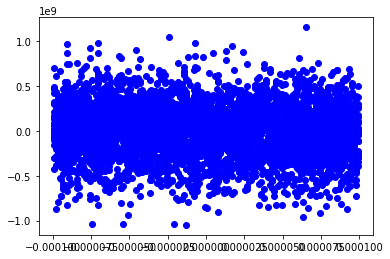

In [4]:
# First lets try plotting the particles in phase space
N = len(data[0])
y = np.zeros(N)
uy = np.zeros(N)
dataInd = data['dataInd']
for i in range(0, N):
    y[i] = data[0][i][dataInd[speciesName + '_' + 'y']]
    uy[i] = data[0][i][dataInd[speciesName + '_' + 'uy']]
plt.plot(y, uy, 'bo')
plt.show()

In [5]:
# Lets test h5py instead
import h5py

fileName = '/media/robert/Data_Storage/VSim/RampFirstTest/DriveWitnessFirstTest_rhoBeam_100.h5'
# r is read only, we don't want to modify the data
f = h5py.File(fileName, 'r')

globalGridGlobal
globalGridGlobalLimits
rhoBeam
runInfo
time


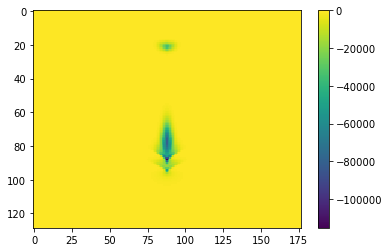

vsType : b'limits'
vsKind : b'Cartesian'
vsLowerBounds : [ 0.04855312 -0.00022   ]
vsUpperBounds : [ 0.04895312  0.00022   ]
vsType
vsKind
vsStartCell
vsNumCells
vsLowerBounds
vsUpperBounds
vsNumCells : [128 176]
-- rhoWitness Attributes --
vsType : b'variable'
vsMesh : b'globalGridGlobal'
vsTimeGroup : b'time'
vsLimits : b'globalGridGlobalLimits'
time : 1.62791995745e-10
vsCentering : b'none'
vsLabels : b'rhoBeam'
vsAxisLabels : b'X,Y'


In [6]:
f.name
for name in f:
    print(name)
rhoWitness = f['rhoBeam']
plt.imshow(rhoWitness[:,:,0], aspect='auto')
plt.colorbar()
plt.show()
limits = f['globalGridGlobalLimits']
mesh = f['globalGridGlobal']
info = f['runInfo']
for name in limits.attrs:
    print(name, ':', limits.attrs[name])
for name in mesh.attrs:
    print(name)
print('vsNumCells :', mesh.attrs['vsNumCells'])
print('-- rhoWitness Attributes --')
for name in rhoWitness.attrs:
    print(name, ':', rhoWitness.attrs[name])

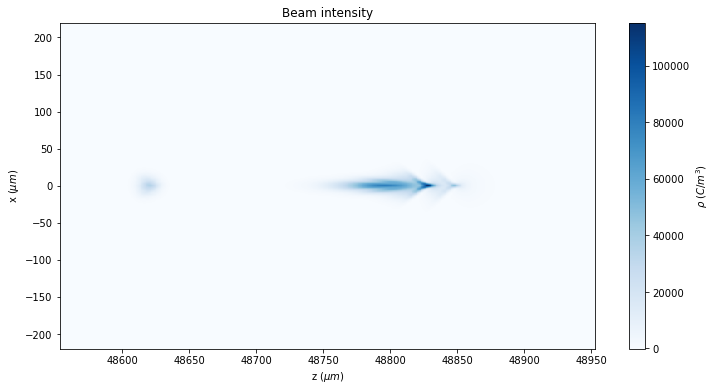

In [7]:
# Resample at a higher resolution for nice looking plots
from scipy.ndimage.interpolation import zoom
data = np.flipud(np.transpose(abs(rhoWitness[:,:,0])))
zoomData = zoom(data, zoom=5.0)
lowerBounds = limits.attrs['vsLowerBounds']
upperBounds = limits.attrs['vsUpperBounds']
bounds = np.array([lowerBounds[0], upperBounds[0], lowerBounds[1], upperBounds[1]])
bounds = bounds*1e6

plt.figure(figsize=(12,6))
plt.imshow(zoomData, aspect='auto', extent=bounds)
cb = plt.colorbar()
cb.set_label(r'$\rho$ ($C/m^3$)')
plt.set_cmap('Blues')
plt.xlabel(r'z ($\mu m$)')
plt.ylabel(r'x ($\mu m$)')
plt.title('Beam intensity')
plt.show()

In [8]:
fileName = '/media/robert/Data_Storage/VSim/RampFirstTest/DriveWitnessFirstTest_ElecFieldBeam_100.h5'
# r is read only, we don't want to modify the data
f = h5py.File(fileName, 'r')
for name in f:
    print(name)
data = f['ElecFieldBeam']
print(data)
print(np.insert(np.shape(data), 0, 5))

ElecFieldBeam
derivedVariables
globalGridGlobal
globalGridGlobalLimits
runInfo
time
<HDF5 dataset "ElecFieldBeam": shape (129, 177, 3), type "<f8">
[  5 129 177   3]


In [9]:
from vsim import load

path = '/media/robert/Data_Storage/VSim/RampFirstTest/'
simName = 'DriveWitnessFirstTest'
fieldName = 'rhoBeam'

data, attrs = load.load_field(path, simName, fieldName)

In [10]:
fileName = '/media/robert/Data_Storage/VSim/RampFirstTest/DriveWitnessFirstTest_WitnessBeam_100.h5'
f = h5py.File(fileName)
for name in f:
    print(name, ':', f[name])
info = f['runInfo']
print('\n----Run Info----')
for name in info.attrs:
    print(name, ':', info.attrs[name])
particle = f['WitnessBeam']
print('\n----Particle Info----')
for name in particle.attrs:
    print(name, ':', particle.attrs[name])
limits = f['globalGridGlobalLimits']
print('\n----Mesh Info----')
for name in limits.attrs:
    print(name, ':', limits.attrs[name])

WitnessBeam : <HDF5 dataset "WitnessBeam": shape (4160, 7), type "<f8">
globalGridGlobalLimits : <HDF5 group "/globalGridGlobalLimits" (0 members)>
runInfo : <HDF5 group "/runInfo" (0 members)>
time : <HDF5 group "/time" (0 members)>

----Run Info----
vsType : b'runInfo'
vsSoftware : b'VORPAL'
vsSwVersion : b'8.1.0'
vsSwRevision : b'29498'
vsSciMakeRevision : b'1173'
vsCxxCompiler : b'/usr/local/internal/VSIM-8.1/mpich-3.1.4-shared/bin/mpicxx'
vsCxxCompilerVersion : b'4.9.3'
vsCxxCompilerFlags : b' -fPIC -pipe -std=c++11 -Wno-deprecated-declarations -Werror=return-type'
vsBuildHostType : b'Linux-x86_64'
vsBuildHost : b'qasles11'
vsVsVersion : b'2.1'
vsCommandLine : b'/home/robert/VSim-8.1/Contents/engine/bin//vorpal -dt 6.5116798298e-15 -sd -d 250 -n 50000 -i DriveWitnessFirstTest.pre -o DriveWitnessFirstTest'

----Particle Info----
ptclEnds : [2084 4160 4160 4160]
charge : -1.602176487e-19
mass : 9.10938215e-31
numPtclsInMacro : 154803180162.0
time : 1.62791995745e-10
numSpatialDims :

In [11]:
path = '/media/robert/Data_Storage/VSim/RampFirstTest/'
simName = 'DriveWitnessFirstTest'
speciesName = 'WitnessBeam'

labels = particle.attrs['vsLabels']
print(labels.split(b','))

data, attrs = load.load_species(path, simName, speciesName)

[b'WitnessBeam_x', b'WitnessBeam_y', b'WitnessBeam_ux', b'WitnessBeam_uy', b'WitnessBeam_uz', b'WitnessBeam_tag', b'WitnessBeam_weight']
